              dir_o
count  20881.000000
mean     130.837029
std      100.801620
min        0.000000
25%       35.000000
50%      142.000000
75%      213.000000
max      360.000000


<ipython-input-2-38212e77c270>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r18 = df_r18.append(pd.DataFrame(entropy(df_r18,base=2)/(math.log2(df_r18.shape[0])),columns=["entropy/entropy.max"],


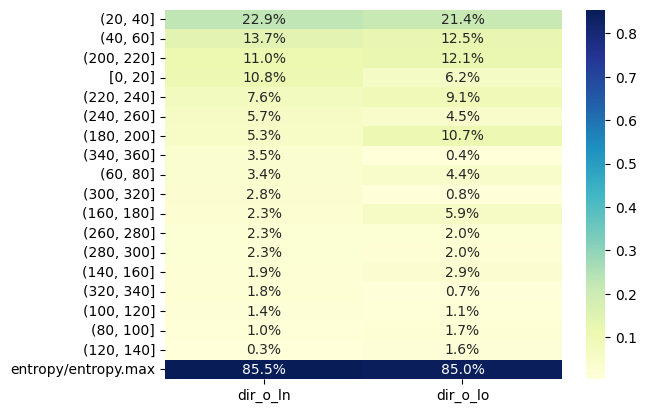

<ipython-input-2-38212e77c270>:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r4 = df_r4.append(pd.DataFrame(entropy(df_r4,base=2)/(math.log2(df_r4.shape[0])),columns=["entropy/entropy.max"],


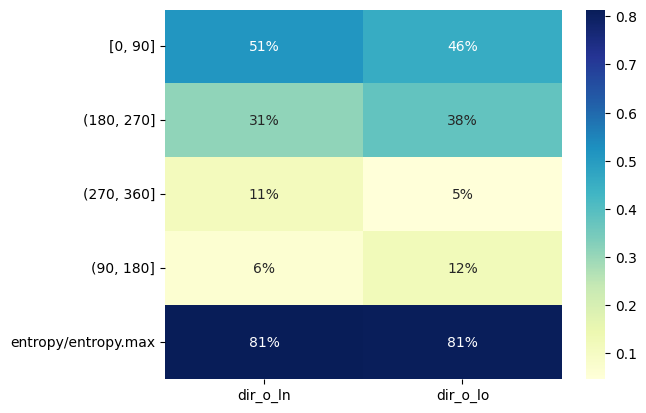

In [2]:
# @title Cortegada
month = 6 # @param {type:"slider", min:1, max:12, step:1}
from pandas.core.arrays import categorical
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import math
import pandas as pd


def average_wind_direction(directions):
    if len(directions) == 0:
        return float('nan')
    total = 0
    for direction in directions:
        direction = direction % 360
        if direction > 180:
            direction = direction - 360
        total += direction
    average = total / len(directions)
    if average < 0:
        average = average + 360
    return average



station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv", usecols = ["time","dir_o"],parse_dates=["time"]).set_index("time").query("index.dt.month =="+str(month))

print(station.describe())

#show duplicated
df_duplicate = station[station.index.duplicated()]
#print("duplicated")
#print(df_duplicate)

#delete duplicated and resample
station = station[~station.index.duplicated(keep='first')]

#reample with mean and new function
station_n = station.resample("H",label="right",closed="right").agg({'dir_o': average_wind_direction})
station_o = station.resample("H",label="right",closed="right").mean()

#label
#dir udr to interval
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']

#show new function
station_n["dir_o_ln"] = pd.cut(station_n["dir_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
#station_n = station_n.drop(["dir_o"],axis=1)


#show mean function
station_o["dir_o_lo"] = pd.cut(station_o["dir_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
#station_o = station_o.drop(["dir_o"],axis=1)

df_c = pd.concat([station_n,station_o],axis=1)

clim_n = df_c["dir_o_ln"].value_counts(normalize=True)
clim_o = df_c["dir_o_lo"].value_counts(normalize=True)
df_r18 = pd.concat([clim_n,clim_o],axis=1)
df_r18 = df_r18.append(pd.DataFrame(entropy(df_r18,base=2)/(math.log2(df_r18.shape[0])),columns=["entropy/entropy.max"],
                    index=df_r18.columns).T)

fig1 = sns.heatmap(df_r18,annot=True,cmap="YlGnBu",fmt='.1%')
plt.show(fig1)

#new intervals
interval = pd.IntervalIndex.from_tuples([(-0.5,90), (90,180),(180,270),(270,360)])
labels = ['[0, 90]','(90, 180]','(180, 270]','(270, 360]']


#show new function
station_n["dir_o_ln"] = pd.cut(station_n["dir_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
station_n = station_n.drop(["dir_o"],axis=1)


#show mean function
station_o["dir_o_lo"] = pd.cut(station_o["dir_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
station_o = station_o.drop(["dir_o"],axis=1)

df_c = pd.concat([station_n,station_o],axis=1)

clim_n = df_c["dir_o_ln"].value_counts(normalize=True)
clim_o = df_c["dir_o_lo"].value_counts(normalize=True)
df_r4 = pd.concat([clim_n,clim_o],axis=1)
df_r4 = df_r4.append(pd.DataFrame(entropy(df_r4,base=2)/(math.log2(df_r4.shape[0])),columns=["entropy/entropy.max"],
                    index=df_r4.columns).T)

fig2 = sns.heatmap(df_r4,annot=True,cmap="YlGnBu",fmt='.0%');
plt.show(fig2)

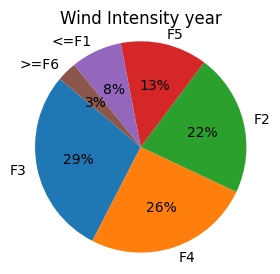

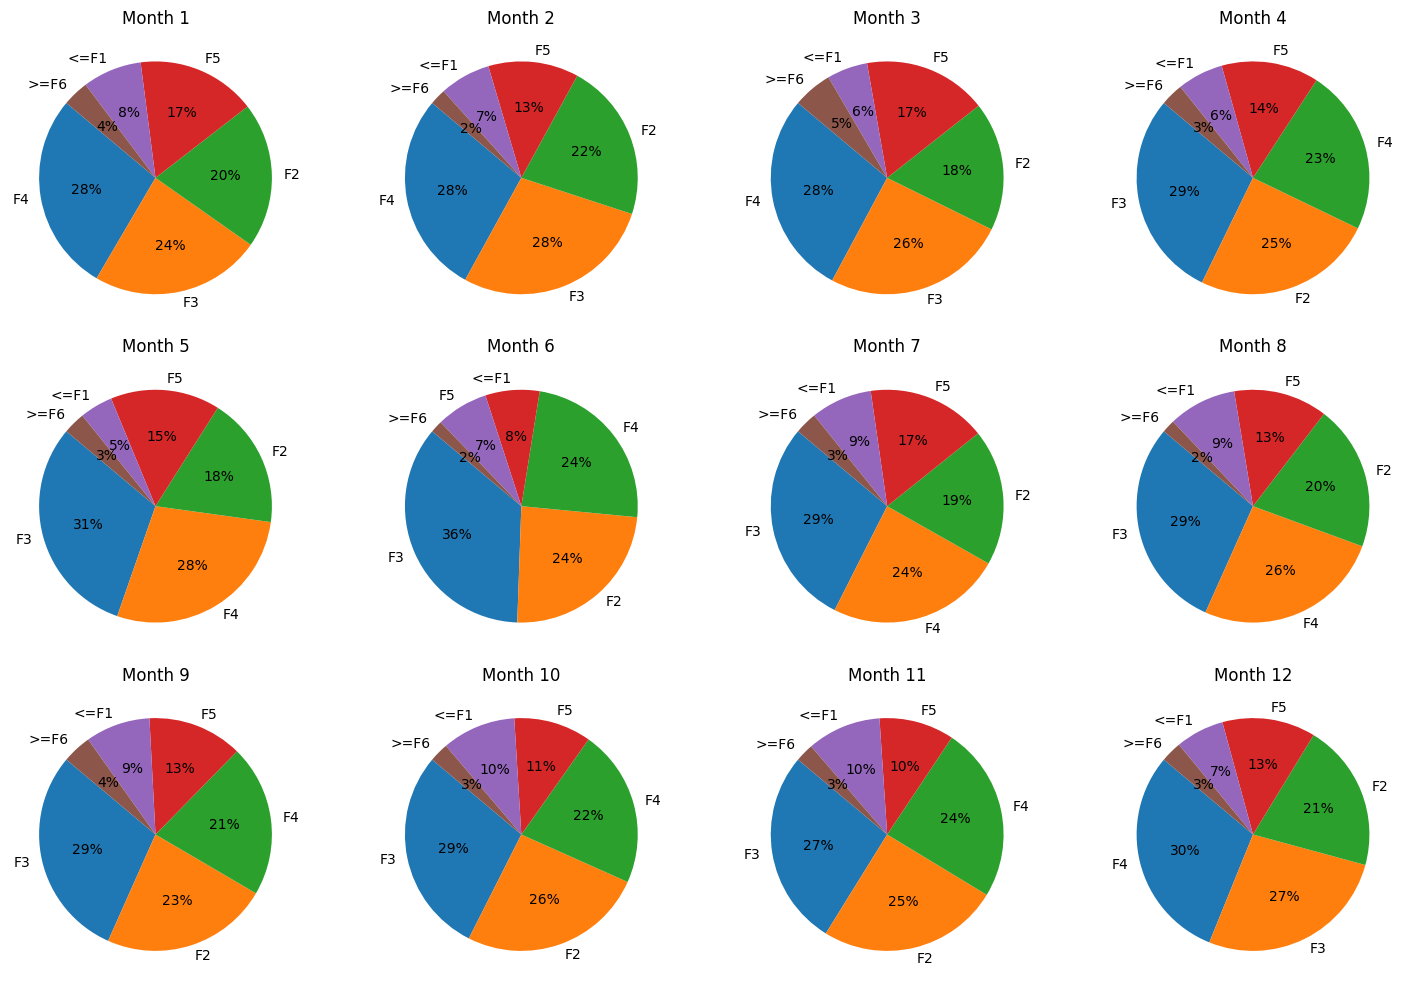

In [40]:
#@title Wind speed hour before (Beaufort) Cortegada
import pandas as pd


def plot_pie_charts_in_rows(dataframes, row_size=3):
    num_dataframes = len(dataframes)
    num_rows = (num_dataframes + row_size - 1) // row_size

    fig, axes = plt.subplots(num_rows, row_size, figsize=(15, 10))

    for idx, df in enumerate(dataframes):
        row = idx // row_size
        col = idx % row_size
        ax = axes[row, col]

        # Plot the pie chart for the current dataframe
        # Modify this part to suit your data and labels
        #df.plot.pie(ax=ax, labels=df.Beaufort_F, y=df.quantity, autopct='%1.0f%%',startangle=140 )
        df.plot.pie(ax=ax, y='quantity', labels=df.Beaufort_F, autopct='%1.0f%%', startangle=140)
        ax.set_title(f"Month {idx + 1}")
        ax.legend().set_visible(False)
        ax.set_ylabel('')

    # Hide any empty subplots
    for idx in range(num_dataframes, num_rows * row_size):
        row = idx // row_size
        col = idx % row_size
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()



station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv", usecols = ["time","spd_o"],parse_dates=["time"]).set_index("time")
df_duplicate = station[station.index.duplicated()]


#delete duplicated and resample
station = station[~station.index.duplicated(keep='first')]
station = station.resample("H",label="right",closed="right").mean()

#label
#dir udr to interval
labels = ["<=F1","F2","F3","F4","F5",">=F6"]
interval = pd.IntervalIndex.from_tuples([(-1, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,60)])


station["spd_o_l"] = pd.cut(station["spd_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
station = station.drop(["spd_o"],axis=1)
b_index = station.value_counts().index.values
data = {'Beaufort_F': [item[0] for item in b_index] ,
        'quantity': station.value_counts().values}
df = pd.DataFrame(data)
df = df.loc[df['quantity'] != 0]


# Creating a pie chart
plt.figure(figsize=(3, 3))  # Set the figure size
plt.pie(df.quantity, labels=df.Beaufort_F, autopct='%1.0f%%', startangle=140)
plt.title('Wind Intensity year Cortegada')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

plt.show()

df_m = []
for m in range (1,13):
  station_m = station.query("index.dt.month =="+str(m))
  b_index = station_m.value_counts().index.values
  data = {'Beaufort_F': [item[0] for item in b_index] ,
        'quantity': station_m.value_counts().values}
  df = pd.DataFrame(data)
  df = df.loc[df['quantity'] != 0]
  df_m.append(df)

plot_pie_charts_in_rows(df_m, row_size=4)





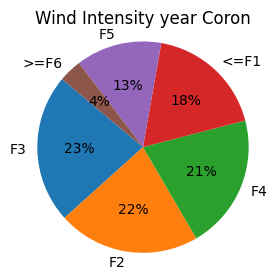

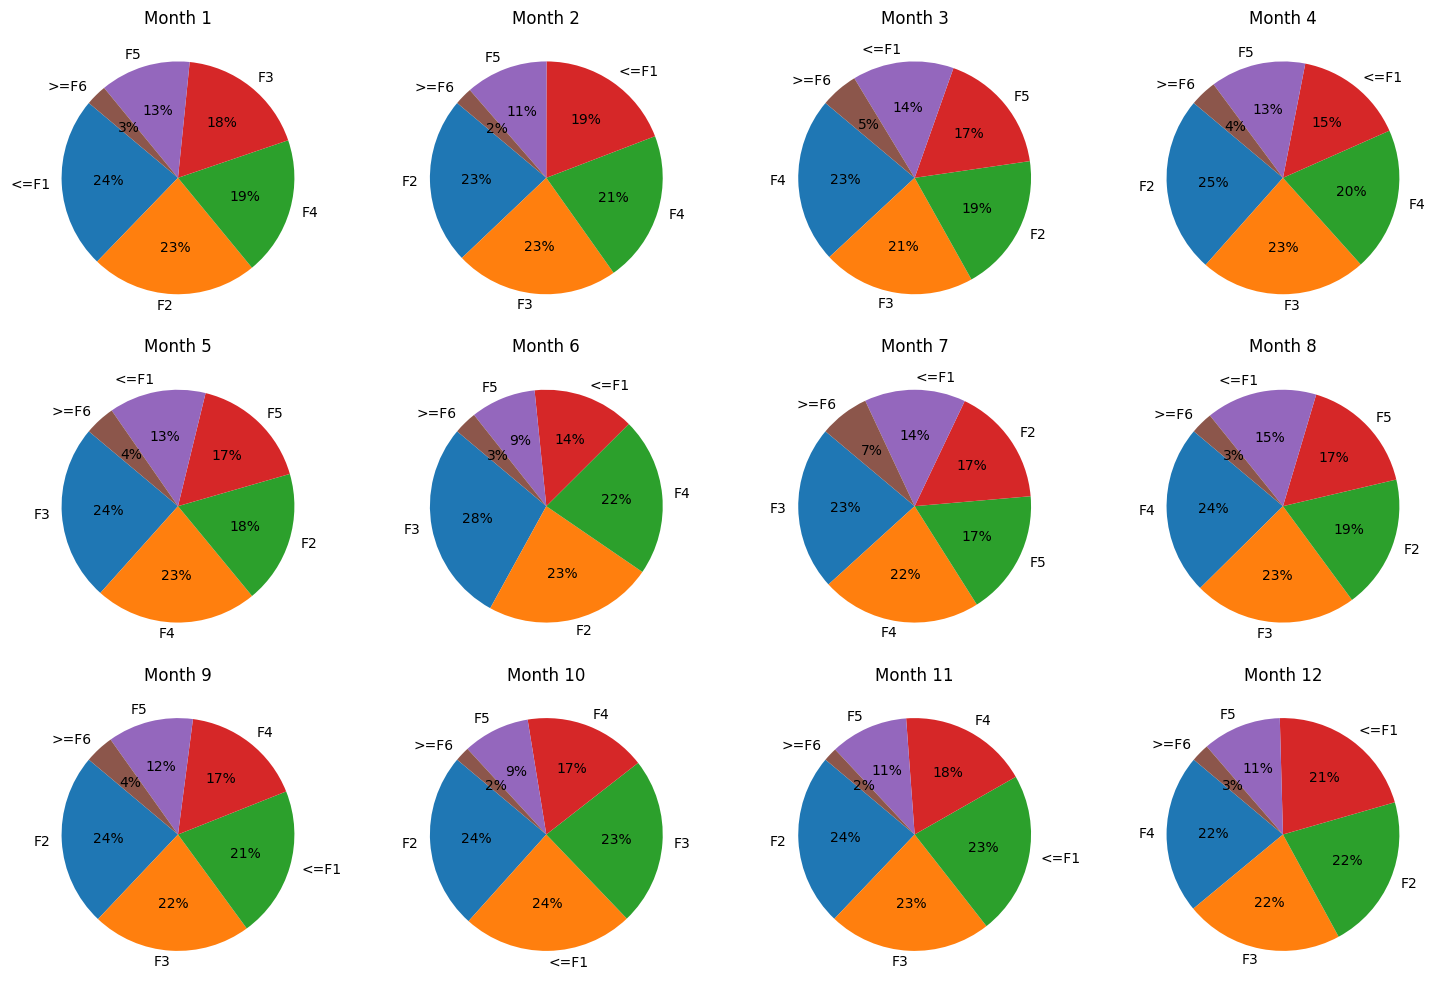

In [42]:
#@title Wind speed hour before (Beaufort) Coron
import pandas as pd


def plot_pie_charts_in_rows(dataframes, row_size=3):
    num_dataframes = len(dataframes)
    num_rows = (num_dataframes + row_size - 1) // row_size

    fig, axes = plt.subplots(num_rows, row_size, figsize=(15, 10))

    for idx, df in enumerate(dataframes):
        row = idx // row_size
        col = idx % row_size
        ax = axes[row, col]

        # Plot the pie chart for the current dataframe
        # Modify this part to suit your data and labels
        #df.plot.pie(ax=ax, labels=df.Beaufort_F, y=df.quantity, autopct='%1.0f%%',startangle=140 )
        df.plot.pie(ax=ax, y='quantity', labels=df.Beaufort_F, autopct='%1.0f%%', startangle=140)
        ax.set_title(f"Month {idx + 1}")
        ax.legend().set_visible(False)
        ax.set_ylabel('')

    # Hide any empty subplots
    for idx in range(num_dataframes, num_rows * row_size):
        row = idx // row_size
        col = idx % row_size
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()



station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/coron.csv", usecols = ["time","spd_o"],parse_dates=["time"]).set_index("time")
df_duplicate = station[station.index.duplicated()]


#delete duplicated and resample
station = station[~station.index.duplicated(keep='first')]
station = station.resample("H",label="right",closed="right").mean()

#label
#dir udr to interval
labels = ["<=F1","F2","F3","F4","F5",">=F6"]
interval = pd.IntervalIndex.from_tuples([(-1, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,60)])


station["spd_o_l"] = pd.cut(station["spd_o"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
station = station.drop(["spd_o"],axis=1)
b_index = station.value_counts().index.values
data = {'Beaufort_F': [item[0] for item in b_index] ,
        'quantity': station.value_counts().values}
df = pd.DataFrame(data)
df = df.loc[df['quantity'] != 0]


# Creating a pie chart
plt.figure(figsize=(3, 3))  # Set the figure size
plt.pie(df.quantity, labels=df.Beaufort_F, autopct='%1.0f%%', startangle=140)
plt.title('Wind Intensity year Coron')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

plt.show()

df_m = []
for m in range (1,13):
  station_m = station.query("index.dt.month =="+str(m))
  b_index = station_m.value_counts().index.values
  data = {'Beaufort_F': [item[0] for item in b_index] ,
        'quantity': station_m.value_counts().values}
  df = pd.DataFrame(data)
  df = df.loc[df['quantity'] != 0]
  df_m.append(df)

plot_pie_charts_in_rows(df_m, row_size=4)
